# Airbnb Calendar Understanding and Cleansing

1. Import Libraries
2. Import Calendar Data
3. Change Data Type & Find missing values
4. Check for duplicates
5. Histogram - Price
6. Histogram - Adjusted_price
7. Histogram - Minimum Nights
8. Histogram - Maximum Nights
9. Descriptive Analysis
10. Export

# 1. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os

# 2. Import Calendar Data

In [2]:
path = r'C:\Users\lizan\Desktop\Data Analytics\07-22 Airbnb Toronto Analysis'

In [3]:
cal = pd.read_csv(os.path.join(path,'02 Data', 'Original Data', 'calendar.csv'), index_col = False)

In [4]:
cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1419,2022-06-06,f,$469.00,$469.00,28.0,730.0
1,1419,2022-06-07,f,$469.00,$469.00,28.0,730.0
2,1419,2022-06-08,f,$469.00,$469.00,28.0,730.0
3,1419,2022-06-09,f,$469.00,$469.00,28.0,730.0
4,1419,2022-06-10,f,$469.00,$469.00,28.0,730.0


In [5]:
cal.shape

(5537417, 7)

In [6]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5537417 entries, 0 to 5537416
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 295.7+ MB


# 3. Change Data Type

In [7]:
# change listing_id to string
cal['listing_id'] = cal['listing_id'].astype('str')

In [19]:
# Remove the $ from the price data
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [20]:
# adjust price data type to float
cal['price'] = cal['price'].apply(clean_currency).astype('float')

In [22]:
# adjust adjusted_price data type to float
cal['adjusted_price'] = cal['adjusted_price'].apply(clean_currency).astype('float')

In [23]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5537417 entries, 0 to 5537416
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      object 
 1   date            object 
 2   available       object 
 3   price           float64
 4   adjusted_price  float64
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(4), object(3)
memory usage: 295.7+ MB


In [30]:
# find null values
cal.isnull().sum()

listing_id        0
date              0
available         0
price             2
adjusted_price    2
minimum_nights    2
maximum_nights    2
dtype: int64

In [33]:
# change null/Nan values to 0
cal['price'] = cal['price'].fillna(0)

In [34]:
cal['adjusted_price'] = cal['adjusted_price'].fillna(0)

In [37]:
cal['minimum_nights'] = cal['minimum_nights'].fillna(0)

In [38]:
cal['maximum_nights'] = cal['maximum_nights'].fillna(0)

In [39]:
cal = cal.astype({"price":'int64',"adjusted_price":'int64',"minimum_nights":'int64',"maximum_nights":'int64'})

In [42]:
# Confirm data type change
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5537417 entries, 0 to 5537416
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      object
 1   date            object
 2   available       object
 3   price           int64 
 4   adjusted_price  int64 
 5   minimum_nights  int64 
 6   maximum_nights  int64 
dtypes: int64(4), object(3)
memory usage: 295.7+ MB


# 4. Check for Duplicates

In [43]:
# Find duplicates
cal_dups = cal[cal.duplicated()]

In [44]:
cal_dups

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights


# 5. Histogram Price

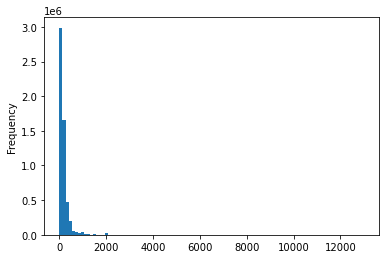

In [46]:
hist_price = cal['price'].plot.hist(bins=100)

In [47]:
# check for prices over $7000
cal.loc[cal['price'] > 7000]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
651160,16039481,2022-06-06,f,12591,12591,28,1125
651161,16039481,2022-06-07,f,12591,12591,28,1125
651162,16039481,2022-06-08,f,12591,12591,28,1125
651163,16039481,2022-06-09,f,12591,12591,28,1125
651164,16039481,2022-06-10,f,12591,12591,28,1125
...,...,...,...,...,...,...,...
4888436,629586015519809653,2023-05-26,t,7987,7987,30,365
4888437,629586015519809653,2023-05-27,t,7987,7987,30,365
4888443,629586015519809653,2023-06-02,t,7987,7987,30,365
4888444,629586015519809653,2023-06-03,t,7987,7987,30,365


In [48]:
# Mark prices over $7000 as Nan
cal.loc[cal['price'] > 7000, 'price'] = np.nan

In [49]:
cal['price'].max()

7000.0

# 6. Historgram - Adjusted Price

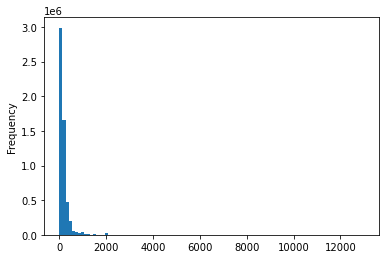

In [51]:
hist_aprice = cal['adjusted_price'].plot.hist(bins=100)

In [52]:
# Mark prices over $7000 as Nan
cal.loc[cal['adjusted_price'] > 7000, 'adjusted_price'] = np.nan

In [53]:
cal['adjusted_price'].max()

7000.0

# 7. Histogram - Minimum_nights

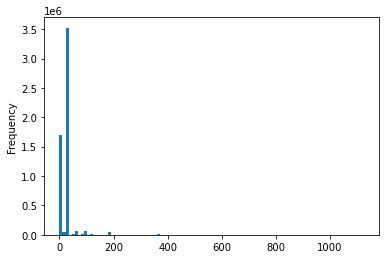

In [54]:
hist_min = cal['minimum_nights'].plot.hist(bins=100)

In [56]:
# Mark nights over 90 as NaN
cal.loc[cal['minimum_nights'] > 90, 'minimum_nights'] = np.nan

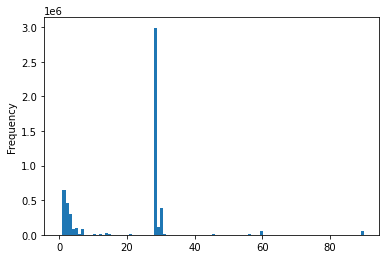

In [57]:
hist_min2 = cal['minimum_nights'].plot.hist(bins=100)

# 8. Histogram - Max Nights

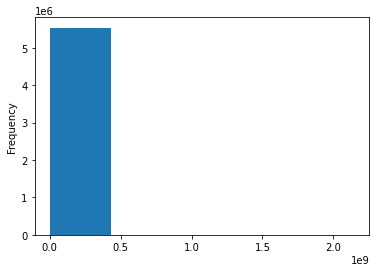

In [61]:
hist_max = cal['maximum_nights'].plot.hist(bins=5)

In [62]:
cal['maximum_nights'].max()

2147483647

In [63]:
# Mark nights over 90 as NaN
cal.loc[cal['maximum_nights'] > 90, 'maximum_nights'] = np.nan

In [64]:
cal['maximum_nights'].max()

90.0

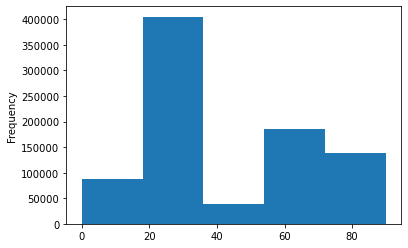

In [65]:
hist_max2 = cal['maximum_nights'].plot.hist(bins=5)

# 9. Descriptive Analysis

In [66]:
cal.describe()

,price,adjusted_price,minimum_nights,maximum_nights
count,5.534754e+06,5.534754e+06,5.412488e+06,855288.000000
mean,1.800694e+02,1.796826e+02,2.111493e+01,44.328651
std,2.235867e+02,2.230948e+02,1.468759e+01,24.971267
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,7.800000e+01,7.800000e+01,3.000000e+00,28.000000
50%,1.200000e+02,1.200000e+02,2.800000e+01,31.000000
75%,2.000000e+02,2.000000e+02,2.800000e+01,60.000000
max,7.000000e+03,7.000000e+03,9.000000e+01,90.000000


# 10. Export

In [67]:
cal.to_pickle(os.path.join(path,'02 Data','Prepared Data','Calendar_Clean.pkl'))